# Question 1.

 
Introduction:
Special thanks to: https://github.com/justmarkham for sharing the dataset and 
materials.
Occupations
Step 1. Import the necessary libraries
Step 2. Import the dataset from this address.
Step 3. Assign it to a variable called users
Step 4. Discover what is the mean age per occupation
Step 5. Discover the Male ratio per occupation and sort it from the most to the least
Step 6. For each occupation, calculate the minimum and maximum ages
Step 7. For each combination of occupation and sex, calculate the mean age
Step 8. For each occupation present the percentage of women and men

Step 1. Import the necessary libraries

In [9]:
import numpy as np 
import pandas as pd

step 2. Import the dataset from this address.

In [10]:
dataset = pd.read_csv("https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user",sep="|")

In [11]:
dataset

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213
...,...,...,...,...,...
938,939,26,F,student,33319
939,940,32,M,administrator,02215
940,941,20,M,student,97229
941,942,48,F,librarian,78209


Step 3. Assign it to a variable called users.

In [12]:
users=dataset

In [13]:
users

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213
...,...,...,...,...,...
938,939,26,F,student,33319
939,940,32,M,administrator,02215
940,941,20,M,student,97229
941,942,48,F,librarian,78209


step 4. Discover what is the mean age per occupation.

In [14]:
#https://stackoverflow.com/questions/15222754/groupby-pandas-dataframe-and-select-most-common-value/54304691#54304691
users.groupby('occupation').age.agg(['mean'])

,mean
occupation,
administrator,38.746835
artist,31.392857
doctor,43.571429
educator,42.010526
engineer,36.388060
entertainment,29.222222
executive,38.718750
healthcare,41.562500
homemaker,32.571429


Step 5. Discover the Male ratio per occupation and sort it from the most to the least

In [15]:
#https://stackoverflow.com/questions/15222754/groupby-pandas-dataframe-and-select-most-common-value/54304691#54304691
users['Male']=users.gender.apply(lambda x: True if x == 'M' else False)
users.Male

0       True
1      False
2       True
3       True
4      False
       ...  
938    False
939     True
940     True
941    False
942     True
Name: Male, Length: 943, dtype: bool

In [16]:
(users.groupby('occupation').Male.sum() / users.groupby('occupation').gender.count()).sort_values(ascending = False)

occupation
doctor           1.000000
engineer         0.970149
technician       0.962963
retired          0.928571
programmer       0.909091
executive        0.906250
scientist        0.903226
entertainment    0.888889
lawyer           0.833333
salesman         0.750000
educator         0.726316
student          0.693878
other            0.657143
marketing        0.615385
writer           0.577778
none             0.555556
administrator    0.544304
artist           0.535714
librarian        0.431373
healthcare       0.312500
homemaker        0.142857
dtype: float64

Step 6. For each occupation, calculate the minimum and maximum ages

In [18]:
#https://stackoverflow.com/questions/32965589/find-min-max-and-average-of-an-id-in-python-pandas
users.groupby('occupation').age.agg(['min','max'])

,min,max
occupation,,
administrator,21,70
artist,19,48
doctor,28,64
educator,23,63
engineer,22,70
entertainment,15,50
executive,22,69
healthcare,22,62
homemaker,20,50


Step 7. For each combination of occupation and sex, calculate the mean age

In [19]:
users.groupby(['occupation', 'gender']).age.mean()

occupation     gender
administrator  F         40.638889
               M         37.162791
artist         F         30.307692
               M         32.333333
doctor         M         43.571429
educator       F         39.115385
               M         43.101449
engineer       F         29.500000
               M         36.600000
entertainment  F         31.000000
               M         29.000000
executive      F         44.000000
               M         38.172414
healthcare     F         39.818182
               M         45.400000
homemaker      F         34.166667
               M         23.000000
lawyer         F         39.500000
               M         36.200000
librarian      F         40.000000
               M         40.000000
marketing      F         37.200000
               M         37.875000
none           F         36.500000
               M         18.600000
other          F         35.472222
               M         34.028986
programmer     F         32.16666

Step 8. For each occupation present the percentage of women and men

In [20]:
# creating a data frame for applying count to gender
df = users.groupby(['occupation', 'gender']).agg({'gender': 'count'})

# creating a data frame for applying count for each occupation
count_of_occupation = users.groupby(['occupation']).count()

# divide the df by the count_of_occupation and multiply by 100
percentage = df.div(count_of_occupation, level = "occupation")*100
percentage.loc[:, 'gender']

occupation     gender
administrator  F          45.569620
               M          54.430380
artist         F          46.428571
               M          53.571429
doctor         M         100.000000
educator       F          27.368421
               M          72.631579
engineer       F           2.985075
               M          97.014925
entertainment  F          11.111111
               M          88.888889
executive      F           9.375000
               M          90.625000
healthcare     F          68.750000
               M          31.250000
homemaker      F          85.714286
               M          14.285714
lawyer         F          16.666667
               M          83.333333
librarian      F          56.862745
               M          43.137255
marketing      F          38.461538
               M          61.538462
none           F          44.444444
               M          55.555556
other          F          34.285714
               M          65.714286
progra

# Question 2. Euro Teams


Step 1. Import the necessary libraries
Step 2. Import the dataset from this address
Step 3. Assign it to a variable called euro12
Step 4. Select only the Goal column
Step 5. How many team participated in the Euro2012?
Step 6. What is the number of columns in the dataset?
Step 7. View only the columns Team, Yellow Cards and Red Cards and assign them 
to a dataframe called discipline
Step 8. Sort the teams by Red Cards, then to Yellow Cards
Step 9. Calculate the mean Yellow Cards given per Team
Step 10. Filter teams that scored more than 6 goalsStep 11. Select the teams that start 
with G
Step 12. Select the first 7 columns
Step 13. Select all columns except the last 3
Step 14. Present only the Shooting Accuracy from England, Italy and Russia

Step 1. Import the necessary libraries

In [21]:
import numpy as np
import pandas as pd

Step 2. Import the dataset from this address

In [22]:
euro_team = pd.read_csv("https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv")

In [23]:
euro_team

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,13,81.3%,41,62,2,9,0,9,9,16
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,9,60.1%,53,73,8,7,0,11,11,19
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,10,66.7%,25,38,8,4,0,7,7,15
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,22,88.1%,43,45,6,5,0,11,11,16
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,6,54.6%,36,51,5,6,0,11,11,19
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,20,74.1%,101,89,16,16,0,18,18,19
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,12,70.6%,35,30,3,5,0,7,7,15
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,6,66.7%,48,56,3,7,1,7,7,17


Step 3. Assign it to a variable called euro12

In [24]:
euro12 = euro_team
euro12

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,13,81.3%,41,62,2,9,0,9,9,16
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,9,60.1%,53,73,8,7,0,11,11,19
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,10,66.7%,25,38,8,4,0,7,7,15
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,22,88.1%,43,45,6,5,0,11,11,16
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,6,54.6%,36,51,5,6,0,11,11,19
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,20,74.1%,101,89,16,16,0,18,18,19
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,12,70.6%,35,30,3,5,0,7,7,15
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,6,66.7%,48,56,3,7,1,7,7,17


Step 4. Select only the Goal column

In [25]:
euro12['Goals']

0      4
1      4
2      4
3      5
4      3
5     10
6      5
7      6
8      2
9      2
10     6
11     1
12     5
13    12
14     5
15     2
Name: Goals, dtype: int64

Step 5. How many team participated in the Euro2012?

In [28]:
len(euro12['Team'])

16

In [29]:
euro12['Team'].count()

16

Step 6. What is the number of columns in the dataset?

In [30]:
len(euro12.columns)

35

Step 7. View only the columns Team, Yellow Cards and Red Cards and assign them to a dataframe called discipline

In [31]:
discipline = euro12[['Team','Yellow Cards','Red Cards']]
discipline

,Team,Yellow Cards,Red Cards
0,Croatia,9,0
1,Czech Republic,7,0
2,Denmark,4,0
3,England,5,0
4,France,6,0
5,Germany,4,0
6,Greece,9,1
7,Italy,16,0
8,Netherlands,5,0
9,Poland,7,1



Step 8. Sort the teams by Red Cards, then to Yellow Cards

In [39]:
discipline.sort_values(['Red Cards', 'Yellow Cards'], ascending = True)

,Team,Yellow Cards,Red Cards
2,Denmark,4,0
5,Germany,4,0
3,England,5,0
8,Netherlands,5,0
15,Ukraine,5,0
4,France,6,0
12,Russia,6,0
1,Czech Republic,7,0
14,Sweden,7,0
0,Croatia,9,0



Step 9. Calculate the mean Yellow Cards given per Team

In [40]:
perteam_yellow= pd.DataFrame(euro12.groupby(['Team'])['Yellow Cards'].mean())
perteam_yellow

,Yellow Cards
Team,
Croatia,9.0
Czech Republic,7.0
Denmark,4.0
England,5.0
France,6.0
Germany,4.0
Greece,9.0
Italy,16.0
Netherlands,5.0


Step 10. Filter teams that scored more than 6 goalsStep

In [41]:
euro12[euro12['Goals'] > 6]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
13,Spain,12,42,33,55.9%,16.0%,100,0,1,0,...,15,93.8%,102,83,19,11,0,17,17,18


Step 11. Select the teams that start with G

In [42]:
euro12[euro12.Team.str.startswith('G')]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20


Step 12. Select the first 7 coumns

In [43]:
euro12[euro12.columns[0:7]]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked)
0,Croatia,4,13,12,51.9%,16.0%,32
1,Czech Republic,4,13,18,41.9%,12.9%,39
2,Denmark,4,10,10,50.0%,20.0%,27
3,England,5,11,18,50.0%,17.2%,40
4,France,3,22,24,37.9%,6.5%,65
5,Germany,10,32,32,47.8%,15.6%,80
6,Greece,5,8,18,30.7%,19.2%,32
7,Italy,6,34,45,43.0%,7.5%,110
8,Netherlands,2,12,36,25.0%,4.1%,60
9,Poland,2,15,23,39.4%,5.2%,48


Step 13. Select all columns except the last 3

In [44]:
euro12.iloc[:,0:-3]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Clean Sheets,Blocks,Goals conceded,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,0,10,3,13,81.3%,41,62,2,9,0
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,1,10,6,9,60.1%,53,73,8,7,0
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,1,10,5,10,66.7%,25,38,8,4,0
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,2,29,3,22,88.1%,43,45,6,5,0
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,1,7,5,6,54.6%,36,51,5,6,0
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,1,11,6,10,62.6%,63,49,12,4,0
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,1,23,7,13,65.1%,67,48,12,9,1
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,2,18,7,20,74.1%,101,89,16,16,0
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,0,9,5,12,70.6%,35,30,3,5,0
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,0,8,3,6,66.7%,48,56,3,7,1


Step 14. Present only the Shooting Accuracy from Englad, Italy and Russia

In [45]:
Countries = euro12[euro12.Team.isin(['England','Italy','Russia'])]
Countries[['Team', 'Shooting Accuracy']]

,Team,Shooting Accuracy
3,England,50.0%
7,Italy,43.0%
12,Russia,22.5%


# Question 3. Housing


Step 1. Import the necessary libraries
Step 2. Create 3 differents Series, each of length 100, as follows:
• The first a random number from 1 to 4
• The second a random number from 1 to 3
• The third a random number from 10,000 to 30,000
Step 3. Create a DataFrame by joinning the Series by column
Step 4. Change the name of the columns to bedrs, bathrs, price_sqr_meter
Step 5. Create a one column DataFrame with the values of the 3 Series and assign it 
to 'bigcolumn'
Step 6. Ops it seems it is going only until index 99. Is it true?
Step 7. Reindex the DataFrame so it goes from 0 to 299


Step 1. Import the necessary libraries

In [54]:
#step1 import the necess. libraries
import pandas as pd
import numpy as np

 Step 2. Create 3 differents Series, each of length 100, as follows

In [55]:
#Step 2. Create 3 differents Series, each of length 100, as follows:
# The first a random number from 1 to 4
series1 = pd.Series(np.random.randint(1,high=5,size=100))
# The second a random number from 1 to 3
series2 = pd.Series(np.random.randint(1,high=4,size=100))
# The third a random number from 10,000 to 30,000
series3 = pd.Series(np.random.randint(10000,high=30001,size=100))
print(series1)
print(series2)
print(series3)

0     3
1     2
2     2
3     3
4     2
     ..
95    3
96    4
97    2
98    4
99    3
Length: 100, dtype: int32
0     3
1     3
2     1
3     2
4     2
     ..
95    3
96    3
97    3
98    1
99    1
Length: 100, dtype: int32
0     26435
1     18134
2     16509
3     14021
4     22483
      ...  
95    20410
96    10857
97    15203
98    24712
99    10434
Length: 100, dtype: int32


Step 3. Create a DataFrame by joinning the Series by column

In [56]:
df = pd.concat([series1,series2,series3],axis=1)
df

,0,1,2
0,3,3,26435
1,2,3,18134
2,2,1,16509
3,3,2,14021
4,2,2,22483
...,...,...,...
95,3,3,20410
96,4,3,10857
97,2,3,15203
98,4,1,24712


Step 4. Change the name of the columns to bedrs, bathrs, price_sqr_meter

In [57]:
df.rename(columns = {0: 'bedrs', 1: 'bathrs', 2: 'price_sqr_meter'}, inplace=True)
df

,bedrs,bathrs,price_sqr_meter
0,3,3,26435
1,2,3,18134
2,2,1,16509
3,3,2,14021
4,2,2,22483
...,...,...,...
95,3,3,20410
96,4,3,10857
97,2,3,15203
98,4,1,24712


Step 5  Create a one column DataFrame with the values of the 3 Series and assign it to 'bigcolumn'

In [58]:
bigcolumn = pd.concat([series1,series2,series3],axis=0)
bigcolumn.to_frame()

,0
0,3
1,2
2,2
3,3
4,2
...,...
95,20410
96,10857
97,15203
98,24712


In [ ]:
Step 6. Ops it seems it is going only until index 99. Is it true? 

In [59]:
len(bigcolumn)

300

In [60]:
# no its length is 300 or it is going until 299

Step 7. Reindex the DataFrame so it goes from 0 to 299

In [61]:
bigcolumn.reset_index(drop=True, inplace=True)
bigcolumn

0          3
1          2
2          2
3          3
4          2
       ...  
295    20410
296    10857
297    15203
298    24712
299    10434
Length: 300, dtype: int32

# Question 4. Wind Statistics

Wind Statistics 
The data have been modified to contain some missing values, identified by NaN.
Using pandas should make this exercise easier, in particular for the bonus question.
You should be able to perform all of these operations without using a for loop or 
other looping construct.
The data in 'wind.data' has the following format:
Yr Mo Dy RPT VAL ROS KIL SHA BIR DUB CLA MUL CLO BEL 
MAL
61 1 1 15.04 14.96 13.17 9.29 NaN 9.87 13.67 10.25 10.83 12.58 18.50 15.04
61 1 2 14.71 NaN 10.83 6.50 12.62 7.67 11.50 10.04 9.79 9.67 17.54 13.83
61 1 3 18.50 16.88 12.33 10.13 11.17 6.17 11.25 NaN 8.50 7.67 12.75 12.71
The first three columns are year, month, and day. The remaining 12 columns are 
average windspeeds in knots at 12 locations in Ireland on that day.
Step 1. Import the necessary libraries
Step 2. Import the dataset from the attached file wind.txt
Step 3. Assign it to a variable called data and replace the first 3 columns by a proper 
datetime index.
Step 4. Year 2061? Do we really have data from this year? Create a function to fix it 
and apply it.
Step 5. Set the right dates as the index. Pay attention at the data type, it should be 
datetime64[ns].
Step 6. Compute how many values are missing for each location over the entire 
record.They should be ignored in all calculations below.
Step 7. Compute how many non-missing values there are in total.
Step 8. Calculate the mean windspeeds of the windspeeds over all the locations and 
all the times.
A single number for the entire dataset.
Step 9. Create a DataFrame called loc_stats and calculate the min, max and mean 
windspeeds and standard deviations of the windspeeds at each location over all the 
days
A different set of numbers for each location.
Step 10. Create a DataFrame called day_stats and calculate the min, max and mean 
windspeed and standard deviations of the windspeeds across all the locations at each 
day.
A different set of numbers for each day.
Step 11. Find the average windspeed in January for each location.
Treat January 1961 and January 1962 both as January.
Step 12. Downsample the record to a yearly frequency for each location.
Step 13. Downsample the record to a monthly frequency for each location.
Step 14. Downsample the record to a weekly frequency for each location.
Step 15. Calculate the min, max and mean windspeeds and standard deviations of the 
windspeeds across all locations for each week (assume that the first week starts on 
January 2 1961) for the first 52 weeks.

step 1. Import necessary libraries.

In [28]:
import pandas as pd
import numpy as np

Step 2. Import the dataset from this address 

Step 3. Assign it to a variable called data and replace the first 3 columns by a proper datetime index.

In [35]:
data = pd.read_csv('wind.txt', sep='\s+')
data

,Yr,Mo,Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,61,1,1,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,61,1,2,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,61,1,3,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,61,1,4,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,61,1,5,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6569,78,12,27,17.58,16.96,17.62,8.08,13.21,11.67,14.46,15.59,14.04,14.00,17.21,40.08
6570,78,12,28,13.21,5.46,13.46,5.00,8.12,9.42,14.33,16.25,15.25,18.05,21.79,41.46
6571,78,12,29,14.00,10.29,14.42,8.71,9.71,10.54,19.17,12.46,14.50,16.42,18.88,29.58
6572,78,12,30,18.50,14.04,21.29,9.13,12.75,9.71,18.08,12.87,12.46,12.12,14.67,28.79


In [36]:
# converting  Yr, Mo and Dy to string
data['Yr'] = data['Yr'].astype(str)
data['Mo'] = data['Mo'].astype(str)
data['Dy'] = data['Dy'].astype(str)

# concatenating first 3 columns
data['Date'] = '20'+ data['Yr'] + '-' + data['Mo'] + '-' + data['Dy']

# converting Date column to datetime
data['Date'] = pd.to_datetime(data['Date'])
data = data.drop(columns = ['Yr','Mo','Dy'])

#moving Date to first column
first = data.pop('Date')
data.insert(0, 'Date', first)
data

,Date,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,2061-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,2061-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,2061-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,2061-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,2061-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6569,2078-12-27,17.58,16.96,17.62,8.08,13.21,11.67,14.46,15.59,14.04,14.00,17.21,40.08
6570,2078-12-28,13.21,5.46,13.46,5.00,8.12,9.42,14.33,16.25,15.25,18.05,21.79,41.46
6571,2078-12-29,14.00,10.29,14.42,8.71,9.71,10.54,19.17,12.46,14.50,16.42,18.88,29.58
6572,2078-12-30,18.50,14.04,21.29,9.13,12.75,9.71,18.08,12.87,12.46,12.12,14.67,28.79


Step 4. Year 2061? Do we really have data from this year? Create a function to fix it and apply it

In [38]:
def fixDate(dt_col):
    if dt_col.year > 2000:
        year = dt_col.year - 100
    else:
        year = dt_col.year
    return datetime.date(year,dt_col.month, dt_col.day)

data['Date'] = data['Date'].apply(fixDate)
data

,Date,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,1961-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,1961-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,1961-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,1961-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6569,1978-12-27,17.58,16.96,17.62,8.08,13.21,11.67,14.46,15.59,14.04,14.00,17.21,40.08
6570,1978-12-28,13.21,5.46,13.46,5.00,8.12,9.42,14.33,16.25,15.25,18.05,21.79,41.46
6571,1978-12-29,14.00,10.29,14.42,8.71,9.71,10.54,19.17,12.46,14.50,16.42,18.88,29.58
6572,1978-12-30,18.50,14.04,21.29,9.13,12.75,9.71,18.08,12.87,12.46,12.12,14.67,28.79


Step 5. Set the right dates as the index. Pay attention at the data type, it should be datetime64[ns]

In [39]:
dataNew = data.set_index('Date')
dataNew.index.astype('datetime64[ns]')

DatetimeIndex(['1961-01-01', '1961-01-02', '1961-01-03', '1961-01-04',
               '1961-01-05', '1961-01-06', '1961-01-07', '1961-01-08',
               '1961-01-09', '1961-01-10',
               ...
               '1978-12-22', '1978-12-23', '1978-12-24', '1978-12-25',
               '1978-12-26', '1978-12-27', '1978-12-28', '1978-12-29',
               '1978-12-30', '1978-12-31'],
              dtype='datetime64[ns]', name='Date', length=6574, freq=None)

Step 6. Compute how many values are missing for each location over the entire record.They should be ignored in all calculations below.

In [40]:
dataNew.isnull().sum()

RPT    6
VAL    3
ROS    2
KIL    5
SHA    2
BIR    0
DUB    3
CLA    2
MUL    3
CLO    1
BEL    0
MAL    4
dtype: int64


Step 7. Compute how many non-missing values there are in total.

In [41]:
nonMissing = dataNew.apply(lambda x: x.count(), axis=0)
print("Total non-missing values are",nonMissing.sum())

Total non-missing values are 78857


Step 8 Calculate the mean windspeeds of the windspeeds over all the locations and all the times.
A single number for the entire dataset.

In [42]:
#ignoring all the null values although it is not required in this case
dataNew.mean(skipna=True).mean()

10.227982360836938

Step 9. Create a DataFrame called loc_stats and calculate the min, max and mean windspeeds and standard deviations of the windspeeds at each location over all the days

In [43]:
loc_stats = pd.DataFrame()
loc_stats['min'] = dataNew.min()
loc_stats['max'] = dataNew.max()
loc_stats['mean'] = dataNew.mean()
loc_stats['standard dev'] = dataNew.std()
loc_stats

,min,max,mean,standard dev
RPT,0.67,35.80,12.362987,5.618413
VAL,0.21,33.37,10.644314,5.267356
ROS,1.50,33.84,11.660526,5.008450
KIL,0.00,28.46,6.306468,3.605811
SHA,0.13,37.54,10.455834,4.936125
BIR,0.00,26.16,7.092254,3.968683
DUB,0.00,30.37,9.797343,4.977555
CLA,0.00,31.08,8.495053,4.499449
MUL,0.00,25.88,8.493590,4.166872
CLO,0.04,28.21,8.707332,4.503954


Step 10. Create a DataFrame called day_stats and calculate the min, max and mean windspeed and standard deviations of the windspeeds across all the locations at each day.

In [44]:
day_stats = pd.DataFrame()
day_stats['min'] = dataNew.min(axis=1)
day_stats['max'] = dataNew.max(axis=1)
day_stats['mean'] = dataNew.mean(axis=1)
day_stats['standard dev'] = dataNew.std(axis=1)
day_stats

,min,max,mean,standard dev
Date,,,,
1961-01-01,9.29,18.50,13.018182,2.808875
1961-01-02,6.50,17.54,11.336364,3.188994
1961-01-03,6.17,18.50,11.641818,3.681912
1961-01-04,1.79,11.75,6.619167,3.198126
1961-01-05,6.17,13.33,10.630000,2.445356
...,...,...,...,...
1978-12-27,8.08,40.08,16.708333,7.868076
1978-12-28,5.00,41.46,15.150000,9.687857
1978-12-29,8.71,29.58,14.890000,5.756836


Step 11. Find the average windspeed in January for each location. Treat January 1961 and January 1962 both as January

In [45]:
dataNew.index = pd.to_datetime(dataNew.index)
dataNew.loc[dataNew.index.month == 1].mean()

RPT    14.847325
VAL    12.914560
ROS    13.299624
KIL     7.199498
SHA    11.667734
BIR     8.054839
DUB    11.819355
CLA     9.512047
MUL     9.543208
CLO    10.053566
BEL    14.550520
MAL    18.028763
dtype: float64

Step 12. Downsample the record to a yearly frequency for each location.

In [46]:
yearlyDS = dataNew.resample('Y').mean()
yearlyDS.index = yearlyDS.index.to_period('Y')
yearlyDS

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Date,,,,,,,,,,,,
1961,12.299583,10.351796,11.362369,6.958227,10.881763,7.729726,9.733923,8.858788,8.647652,9.835577,13.502795,13.680773
1962,12.246923,10.110438,11.732712,6.960440,10.657918,7.393068,11.020712,8.793753,8.316822,9.676247,12.930685,14.323956
1963,12.813452,10.836986,12.541151,7.330055,11.724110,8.434712,11.075699,10.336548,8.903589,10.224438,13.638877,14.999014
1964,12.363661,10.920164,12.104372,6.787787,11.454481,7.570874,10.259153,9.467350,7.789016,10.207951,13.740546,14.910301
1965,12.451370,11.075534,11.848767,6.858466,11.024795,7.478110,10.618712,8.879918,7.907425,9.918082,12.964247,15.591644
1966,13.461973,11.557205,12.020630,7.345726,11.805041,7.793671,10.579808,8.835096,8.514438,9.768959,14.265836,16.307260
1967,12.737151,10.990986,11.739397,7.143425,11.630740,7.368164,10.652027,9.325616,8.645014,9.547425,14.774548,17.135945
1968,11.835628,10.468197,11.409754,6.477678,10.760765,6.067322,8.859180,8.255519,7.224945,7.832978,12.808634,15.017486
1969,11.166356,9.723699,10.902000,5.767973,9.873918,6.189973,8.564493,7.711397,7.924521,7.754384,12.621233,15.762904


Step 13. Downsample the record to a monthly frequency for each location

In [47]:
monthlyDS = dataNew.resample('M').mean()
monthlyDS.index = monthlyDS.index.to_period('M')
monthlyDS

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Date,,,,,,,,,,,,
1961-01,14.841333,11.988333,13.431613,7.736774,11.072759,8.588065,11.184839,9.245333,9.085806,10.107419,13.880968,14.703226
1961-02,16.269286,14.975357,14.441481,9.230741,13.852143,10.937500,11.890714,11.846071,11.821429,12.714286,18.583214,15.411786
1961-03,10.890000,11.296452,10.752903,7.284000,10.509355,8.866774,9.644194,9.829677,10.294138,11.251935,16.410968,15.720000
1961-04,10.722667,9.427667,9.998000,5.830667,8.435000,6.495000,6.925333,7.094667,7.342333,7.237000,11.147333,10.278333
1961-05,9.860968,8.850000,10.818065,5.905333,9.490323,6.574839,7.604000,8.177097,8.039355,8.499355,11.900323,12.011613
...,...,...,...,...,...,...,...,...,...,...,...,...
1978-08,9.645161,8.259355,9.032258,4.502903,7.368065,5.935161,5.650323,5.417742,7.241290,5.536774,10.466774,12.054194
1978-09,10.913667,10.895000,10.635000,5.725000,10.372000,9.278333,10.790333,9.583000,10.069333,8.939000,15.680333,19.391333
1978-10,9.897742,8.670968,9.295806,4.721290,8.525161,6.774194,8.115484,7.337742,8.297742,8.243871,13.776774,17.150000


Step 14. Downsample the record to a weekly frequency for each location.

In [48]:
weeklyDS = dataNew.resample('W').mean()
weeklyDS.index = weeklyDS.index.to_period('W')
weeklyDS

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Date,,,,,,,,,,,,
1960-12-26/1961-01-01,15.040000,14.960000,13.170000,9.290000,NaN,9.870000,13.670000,10.250000,10.830000,12.580000,18.500000,15.040000
1961-01-02/1961-01-08,13.541429,11.486667,10.487143,6.417143,9.474286,6.435714,11.061429,6.616667,8.434286,8.497143,12.481429,13.238571
1961-01-09/1961-01-15,12.468571,8.967143,11.958571,4.630000,7.351429,5.072857,7.535714,6.820000,5.712857,7.571429,11.125714,11.024286
1961-01-16/1961-01-22,13.204286,9.862857,12.982857,6.328571,8.966667,7.417143,9.257143,7.875714,7.145714,8.124286,9.821429,11.434286
1961-01-23/1961-01-29,19.880000,16.141429,18.225714,12.720000,17.432857,14.828571,15.528571,15.160000,14.480000,15.640000,20.930000,22.530000
...,...,...,...,...,...,...,...,...,...,...,...,...
1978-11-27/1978-12-03,14.934286,11.232857,13.941429,5.565714,10.215714,8.618571,9.642857,7.685714,9.011429,9.547143,11.835714,18.728571
1978-12-04/1978-12-10,20.740000,19.190000,17.034286,9.777143,15.287143,12.774286,14.437143,12.488571,13.870000,14.082857,18.517143,23.061429
1978-12-11/1978-12-17,16.758571,14.692857,14.987143,6.917143,11.397143,7.272857,10.208571,7.967143,9.168571,8.565714,11.102857,15.562857


Step 15. Calculate the min, max and mean windspeeds and standard deviations of the windspeeds across all locations for each week (assume that the first week starts on January 2 1961) for the first 52 weeks.

In [49]:
data1961 = dataNew[(dataNew.index < pd.to_datetime('1962-01-01')) & (dataNew.index > pd.to_datetime('1961-01-01'))]
weeklydata = data1961.resample('W').agg(['min','max','mean','std'])
weeklydata

RPT                                VAL                    \
              min    max       mean       std    min    max       mean   
Date                                                                     
1961-01-08  10.58  18.50  13.541429  2.631321   6.63  16.88  11.486667   
1961-01-15   9.04  19.75  12.468571  3.555392   3.54  12.08   8.967143   
1961-01-22   4.92  19.83  13.204286  5.337402   3.42  14.37   9.862857   
1961-01-29  13.62  25.04  19.880000  4.619061   9.96  23.91  16.141429   
1961-02-05  10.58  24.21  16.827143  5.251408   9.46  24.21  15.460000   
1961-02-12  16.00  24.54  19.684286  3.587677  11.54  21.42  16.417143   
1961-02-19   6.04  22.50  15.130000  5.064609  11.63  20.17  15.091429   
1961-02-26   7.79  25.80  15.221429  7.020716   7.08  21.50  13.625714   
1961-03-05  10.96  13.33  12.101429  0.997721   8.83  17.00  12.951429   
1961-03-12   4.88  14.79   9.376667  3.732263   8.08  16.96  11.578571   
1961-03-19   4.92  16.88  11.911429  3.860036   9.46  15.54  13.501429   
1961-03-26   6.29  15.00   9.567143  3.613298   2.58  11.63   8.387143   
1961-04-02   5.88  18.25  10.757143  5.046922   3.50  16.29   8.852857   
1961-04-09   4.50  18.12  11.964286  4.604392   7.04  14.62  10.654286   
1961-04-16   4.71  15.50   8.965714  3.937727   4.83  12.25   8.000000   
1961-04-23   4.00  21.09  12.621429  5.676655   3.71  15.41  10.438571   
1961-04-30   4.08  16.29  10.117143  4.349662   6.50  14.46   9.798571   
1961-05-07   9.87  23.00  15.367143  5.025507  10.29  19.79  13.970000   
1961-05-14   3.54  12.79   7.772857  3.371022   3.96  15.12   8.712857   
1961-05-21   4.88  15.04   8.225714  3.631730   3.58  10.17   5.631667   
1961-05-28   4.96  11.79   8.155714  2.739433   3.67  12.50   7.388571   
1961-06-04   7.00  15.92  10.321429  3.099701   4.75   9.79   7.407143   
1961-06-11   8.29  14.42  10.917143  2.248597   6.83  11.54   8.992857   
1961-06-18   6.13  14.33  10.571429  3.009482   4.12  14.54   9.565714   
1961-06-25   4.00   9.00   7.345714  1.982035   3.25   9.50   6.108571   
1961-07-02   7.21  13.13  10.236667  2.557856   6.34  14.37   9.482857   
1961-07-09   7.29  17.50  11.715714  3.664855   3.75  10.75   7.220000   
1961-07-16   8.63  22.50  16.680000  5.168710   7.87  19.29  13.518571   
1961-07-23   3.04   5.88   4.202857  1.047978   2.92   6.79   4.255714   
1961-07-30   6.13  16.08  10.561429  4.157641   4.63  13.79   8.445714   
1961-08-06   7.67  16.08  10.870000  2.950887   5.09  15.79   8.792857   
1961-08-13   2.88  14.21  10.058333  4.422268   4.42  10.00   7.941429   
1961-08-20  13.13  18.91  15.607143  2.283635   7.25  13.62  10.565714   
1961-08-27   7.67  18.16  12.391429  3.395857   6.87  14.58  11.430000   
1961-09-03   3.63  14.46   8.678571  4.398615   1.13  22.00   8.821429   
1961-09-10   5.00  17.62  10.541429  5.207278   3.04  13.59   8.798571   
1961-09-17   5.33  28.75  17.160000  7.679190   7.12  22.08  14.440000   
1961-09-24   6.92  10.25   8.500000  1.267399   2.92  13.62   7.154286   
1961-10-01  10.34  23.21  16.044286  4.559572   6.96  13.62  11.361667   
1961-10-08   3.13  16.08  11.250000  5.596710   3.63  16.96   8.757143   
1961-10-15   3.71  17.12  10.881667  4.780675   6.13  13.25   9.734286   
1961-10-22  10.46  28.62  19.260000  7.888314   3.75  19.46  13.364286   
1961-10-29   4.33  26.42  16.077143  7.957637   2.75  21.25  11.867143   
1961-11-05   5.88  15.79  11.571429  3.369201   3.96  13.46   9.590000   
1961-11-12   5.46  16.08  10.428571  3.939811   5.50  10.75   7.690000   
1961-11-19   7.50  15.00  10.798571  2.784358   4.21  13.00   7.951429   
1961-11-26   5.75  14.29   9.154286  3.214368   3.29  11.79   7.337143   
1961-12-03   7.92  23.75  12.608571  5.704669   4.67  18.71  10.442857   
1961-12-10  10.83  23.71  17.362857  4.890152   9.21  21.37  14.362857   
1961-12-17   9.29  21.34  14.985714  4.095106   8.63  17.62  13.472857   
1961-12-24  11.46  24.41  15.757143  4.959717   9.79  16.13  11.971429   
1961-12-31   5.04 

# Question 5. 

Step 1. Import the necessary libraries
Step 2. Import the dataset from this address.
Step 3. Assign it to a variable called chipo.
Step 4. See the first 10 entries
Step 5. What is the number of observations in the dataset?
Step 6. What is the number of columns in the dataset?
Step 7. Print the name of all the columns.
Step 8. How is the dataset indexed?
Step 9. Which was the most-ordered item?
Step 10. For the most-ordered item, how many items were ordered?
Step 11. What was the most ordered item in the choice_description column?
Step 12. How many items were orderd in total?
Step 13.
• Turn the item price into a float
• Check the item price type
• Create a lambda function and change the type of item price
• Check the item price type
Step 14. How much was the revenue for the period in the dataset?
Step 15. How many orders were made in the period?
Step 16. What is the average revenue amount per order?
Step 17. How many different items are sold?

Step 1. Import necessory libraries.

In [51]:
 # Libraries
import pandas as pd


Step 2. Import the dataset from this address.
Step 3. Assign it to a variable called chipo.
Step 4. See the first 10 entries

In [53]:
 # Reading dataset and printing first 10 values
link = "https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv"
chipo = pd.read_csv(link, sep = "\t")
chipo[0:10]

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


Step 5. What is the number of observations in the dataset?

In [54]:
 # No of observations
len(chipo)

4622

Step 6. What is the number of columns in the dataset?

In [55]:
len(chipo.columns)

5

Step 7. Print the name of all the columns

In [56]:
# Names of columns
chipo.columns

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')

Step 8. How is the dataset indexed?

In [57]:
# Index
chipo.index

RangeIndex(start=0, stop=4622, step=1)

Step 9. Which was the most-ordered item?

In [58]:
  # Grouping by item name, then sum each item orders, arranging descending and getting topmost index for its name
chipo.groupby('item_name').sum().sort_values(['quantity'], ascending=False).index[0]

'Chicken Bowl'

Step 10. For the most-ordered item, how many items were ordered?

In [60]:
 # Grouping by item name, then sum each item orders, arranging descending and getting topmost
chipo.groupby('item_name').sum().sort_values(['quantity'], ascending=False).head(1)

,order_id,quantity,choice_description,item_price
item_name,,,,
Chicken Bowl,713926,761,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98 $10.98 $11.25 $8.75 $8.49 $11.25 $8.75 ...


Step 11. What was the most ordered item in the choice_description column?

In [61]:
  # Grouping by choice description, then sum each item orders, arranging descending and getting topmost index for its name
chipo.groupby(['choice_description']).quantity.sum().sort_values(ascending = False).index[0]

'[Diet Coke]'

Step 12. How many items were orderd in total?

In [62]:
# Total items
chipo.quantity.sum()

4972

(i) Turn the item price into a float

In [63]:
# Function for converting to float
def convert_to_float(num):
    return float(num[1:-1])

(ii) Check the item price type

In [64]:
 #Checking type
chipo.dtypes.item_price

dtype('O')

(iii) Create a lambda function and change the type of item price

In [65]:
# Creating lambda function and applying to item prices and dispalying
chipo.item_price = chipo.item_price.apply(lambda x: float(x[1:]))
chipo.item_price

0        2.39
1        3.39
2        3.39
3        2.39
4       16.98
        ...  
4617    11.75
4618    11.75
4619    11.25
4620     8.75
4621     8.75
Name: item_price, Length: 4622, dtype: float64

(iv) Check the item price type

In [66]:
 # Checking type
chipo.dtypes.item_price

dtype('float64')

Step 14. How much was the revenue for the period in the dataset?

In [67]:
# Calculating revenue by item by multiplying quantity by price than summing up total revenue
chipo['revenuebyItem'] = chipo['quantity']*chipo.item_price
totalReveneue = chipo.revenuebyItem.sum()
totalReveneue

39237.02

Step 15. How many orders were made in the period?

In [87]:
num_orders = chipo['order_id'].nunique()
print("Number of orders:", num_orders)

Number of orders: 1834


Step 16. What is the average revenue amount per order?


In [98]:
revenue_chipo = (chipo['quantity'] * chipo['item_price']).sum()



In [99]:
total_orders = chipo['order_id'].nunique()

In [100]:
average_revenue_per_order = revenue_chipo / total_orders

In [101]:
print("Average revenue per order is:", average_revenue_per_order)

Average revenue per order is: 21.39423118865867


Step 17. How many different items are sold?

In [102]:
unique_items = chipo['item_name'].nunique()
print("total number of unique items sold are:", unique_items)

total number of unique items sold are: 50


# Question 6.

Create a line plot showing the number of marriages and divorces per capita in the 
U.S. between 1867 and 2014. Label both lines and show the legend.
Don't forget to label your axes!

In [103]:
 # Libraries
import pandas as pd
import matplotlib.pyplot as plt

In [104]:
# Loading data
data = pd.read_csv('us-marriages-divorces-1867-2014.csv')
data.head()

,Year,Marriages,Divorces,Population,Marriages_per_1000,Divorces_per_1000
0,1867,357000.0,10000.0,36970000,9.7,0.3
1,1868,345000.0,10000.0,37885000,9.1,0.3
2,1869,348000.0,11000.0,38870000,9.0,0.3
3,1870,352000.0,11000.0,39905000,8.8,0.3
4,1871,359000.0,12000.0,41010000,8.8,0.3


<Figure size 640x480 with 0 Axes>

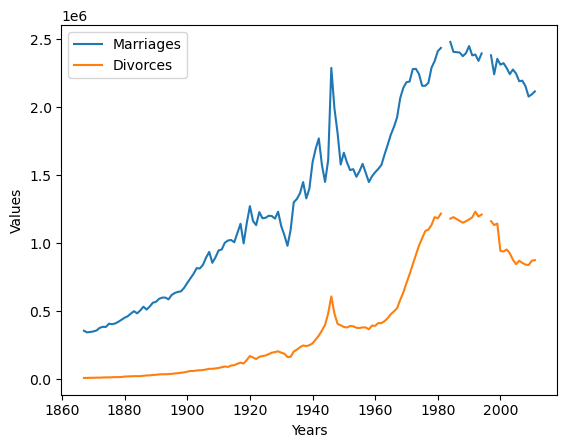

In [105]:
plt.figure()
data.plot('Year',y=['Marriages','Divorces'])
plt.ylabel('Values')
plt.xlabel("Years")
plt.show()

# Question 7.

Create a vertical bar chart comparing the number of marriages and divorces per 
capita in the U.S. between 1900, 1950, and 2000.
Don't forget to label your axes!


In [106]:
# libraries
import numpy as np
import matplotlib.pyplot as plt

In [107]:
 # Loading data
marriage=pd.read_csv('us-marriages-divorces-1867-2014.csv')
marriage.head()

,Year,Marriages,Divorces,Population,Marriages_per_1000,Divorces_per_1000
0,1867,357000.0,10000.0,36970000,9.7,0.3
1,1868,345000.0,10000.0,37885000,9.1,0.3
2,1869,348000.0,11000.0,38870000,9.0,0.3
3,1870,352000.0,11000.0,39905000,8.8,0.3
4,1871,359000.0,12000.0,41010000,8.8,0.3


In [108]:
year=marriage.Year.values
marraige=marriage.Marriages_per_1000.values
divorce=marriage.Divorces_per_1000.values

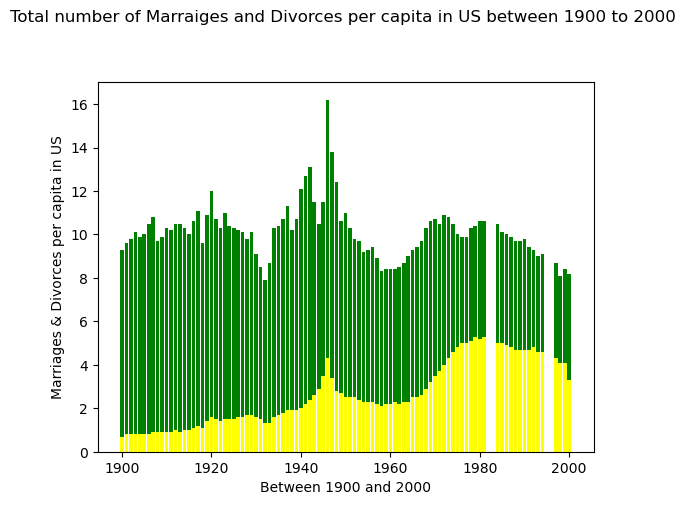

In [109]:
years_1900=marriage.Year>=1900
years_2000=marriage.Year<=2000
Data_1900_2000=marriage[years_1900 & years_2000]
plt.bar(Data_1900_2000['Year'],Data_1900_2000['Marriages_per_1000'],color="Green")
plt.bar(Data_1900_2000['Year'],Data_1900_2000['Divorces_per_1000'],color="Yellow")
plt.title("Total number of Marraiges and Divorces per capita in US between 1900 to 2000 \n\n\n")
plt.xlabel("Between 1900 and 2000")
plt.ylabel("Marriages & Divorces per capita in US")
 
# Show graph
plt.show()

# Question 8.

Create a horizontal bar chart that compares the deadliest actors in Hollywood. Sort 
the actors by their kill count and label each bar with the corresponding actor's name.
Don't forget to label your axes!

In [110]:
# libraries
import numpy as np
import matplotlib.pyplot as pl

In [111]:
# Loading data
data = pd.read_csv('actor_kill_counts.csv')
data.head()

,Actor,Count
0,Arnold Schwarzenegger,369
1,Chow Yun-Fat,295
2,Clint Eastwood,207
3,Clive Owen,194
4,Dolph Lundgren,239


In [112]:
data = data.sort_values('Count', ascending = True)
actorNames = data['Actor'].values
kills = data['Count'].values

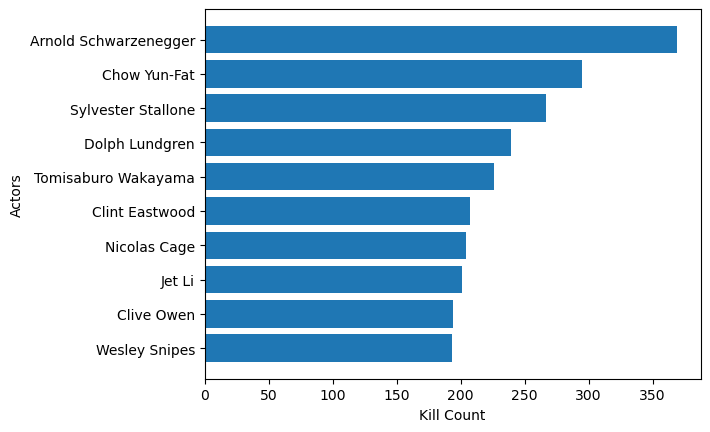

In [113]:
plt.barh(actorNames, kills)
plt.ylabel("Actors")
plt.xlabel("Kill Count")
plt.show()

# Question 9.

Create a pie chart showing the fraction of all Roman Emperors that were 
assassinated.
Make sure that the pie chart is an even circle, labels the categories, and shows the 
percentage breakdown of the categories.


In [114]:
# libraries
import numpy as np
import matplotlib.pyplot as plt

In [115]:
# Loading data
data = pd.read_csv('roman-emperor-reigns.csv')
data.head()

,Emperor,Length_of_Reign,Cause_of_Death
0,Augustus,40.58,Possibly assassinated
1,Tiberius,22.50,Possibly assassinated
2,Caligula,4.83,Assassinated
3,Claudius,13.75,Possibly assassinated
4,Nero,13.67,Suicide


In [116]:
killedEmperors = data[data['Cause_of_Death'].apply(lambda x: 'assassinated' in x.lower())]
killedEmperors.head()

,Emperor,Length_of_Reign,Cause_of_Death
0,Augustus,40.58,Possibly assassinated
1,Tiberius,22.50,Possibly assassinated
2,Caligula,4.83,Assassinated
3,Claudius,13.75,Possibly assassinated
5,Galba,0.58,Assassinated


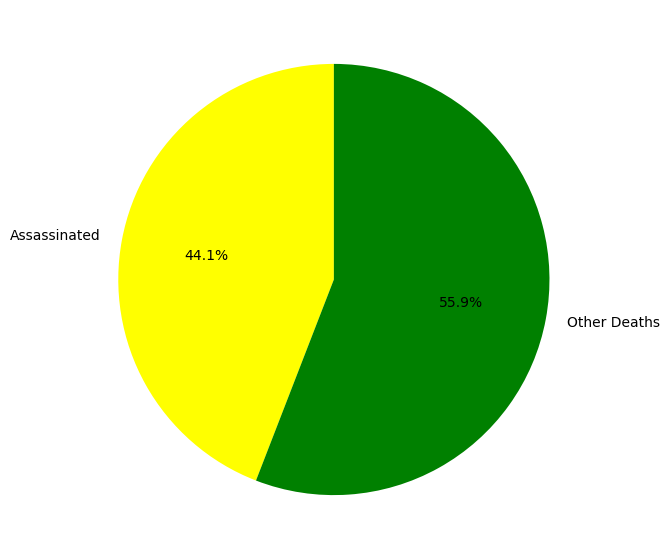

In [117]:
fig = plt.figure(figsize =(10, 7))
colors=['yellow', 'green']
plt.pie([len(killedEmperors),len(data) - len(killedEmperors)], labels = ['Assassinated', 'Other Deaths'],  colors=colors, startangle=90, autopct='%1.1f%%')
 
# show plot
plt.show()

# Question 10.

Create a scatter plot showing the relationship between the total revenue earned by 
arcades and the number of Computer Science PhDs awarded in the U.S. between 
2000 and 2009.
Don't forget to label your axes!
Color each dot according to its year

In [118]:
# libraries
import numpy as np
import matplotlib.pyplot as plt

In [119]:
# Loading data
data = pd.read_csv('arcade-revenue-vs-cs-doctorates.csv')
data.head()

,Year,Total Arcade Revenue (billions),Computer Science Doctorates Awarded (US)
0,2000,1.196,861
1,2001,1.176,830
2,2002,1.269,809
3,2003,1.240,867
4,2004,1.307,948


In [120]:
arcadeRevenue = data['Total Arcade Revenue (billions)'].values
csDocAwardes = data['Computer Science Doctorates Awarded (US)'].values

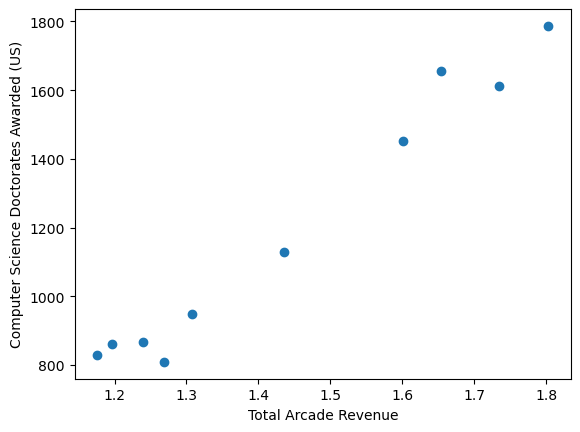

In [121]:
plt.scatter(arcadeRevenue, csDocAwardes)
plt.rcParams.update({'figure.figsize':(10,8), 'figure.dpi':100})
plt.xlabel('Total Arcade Revenue')
plt.ylabel('Computer Science Doctorates Awarded (US)')
plt.show()